### Import librairies
Nous importons les bibliothèque fondamentale pour la programme

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import donnée
Nous allons importer les données des trainSet et testSet dans les features et la variable à déviner

In [84]:
def importData(path, predictColumn=False):
    #columnNames=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    columnNames=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    delimit=','
    data = pd.read_csv(path, names=columnNames, sep=delimit)
    #data = data.drop(columns="ECP")
    if predictColumn:
        x=data.iloc[:, :-1].values
        y=data['FP'].values
        return x, y
    else:
        x=data.iloc[:,:].values
        return x

In [85]:
pathTrain='../3-DataSet/20200122/92/trainSets92.csv'
X_train, y_train = importData(pathTrain,True)

pathTest='../3-DataSet/20200122/92/testSets92.csv'
X_test, y_test = importData(pathTest,True)

### Normalisation et mise en echelle
Avant de faire des prédictions réelles, il est toujours recommandé de mettre à l'échelle les entités afin que toutes puissent être évaluées uniformément. 
L'algorithme de descente de gradient (qui est utilisé dans la formation de réseaux de neurones et d'autres algorithmes d'apprentissage automatique) converge également plus rapidement avec des fonctionnalités normalisées.

In [86]:
from sklearn.preprocessing import StandardScaler

def scaleData(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)


X_train = scaleData(X_train)
X_test = scaleData(X_test)

### Recheche du point omptimal
Avant de passer à la prediction, nous allons chercher le point optimal pour le nombre de voisin par element.

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def plotOptimalNeighbors():
    errors = []
    scores=[]
    for k in range(2,15):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_p = knn.predict(X_test)
        #errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
        scores.append(metrics.accuracy_score(y_test, y_p))
    #plt.plot(range(2,15), errors, 'o-')
    plt.plot(range(2,15), scores, 'o-')
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Accuracy')
    plt.show()

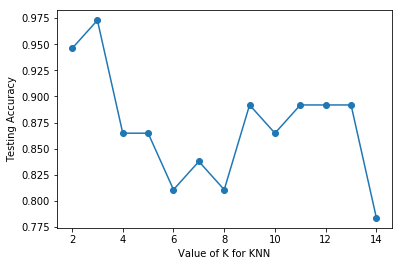

In [88]:
plotOptimalNeighbors()

### Classification & prediction
Il est extrêmement simple de former l''algorithme KNN et de faire des prédictions avec lui, en particulier lors de l''utilisation de Scikit-Learn.
La première étape consiste à importer la KNeighborsClassifierclasse depuis la `sklearn.neighbors` bibliothèque. Dans la deuxième ligne, cette classe est initialisée avec un paramètre, ie 'n_neigbours. Il s'agit essentiellement de la valeur de K. Il n'y a pas de valeur idéale pour K et elle est sélectionnée après test et évaluation, mais pour commencer, 5 semble être la valeur la plus couramment utilisée pour l'algorithme KNN.

In [89]:
#Classification
k=3
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [90]:
#prediction
y_pred = knn.predict(X_test)

## Evaluation
Pour évaluer un algorithme, la matrice de confusion, la précision, le rappel et le score f1 sont les mesures les plus couramment utilisées. Les méthodes confusion_matrixet classification_reportde sklearn.metricspeuvent être utilisées pour calculer ces métriques. Jetez un œil au script suivant:

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
def showConfusionMatrix(ytest,ypred):
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred))
    
def showScore(knn, xtest, ytest):
    print('Score: %f' % knn.score(xtest,ytest))
    print('Erreur: %f' % (1-knn.score(xtest,ytest)))

In [92]:
showConfusionMatrix(y_test,y_pred)
showScore(knn, X_test,y_test)

[[20  0]
 [ 1 16]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.94      0.97        17

avg / total       0.97      0.97      0.97        37

Score: 0.972973
Erreur: 0.027027


In [93]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.972972972973


### Plot
Nous allos afficher les éléments et leur comportement après prediction

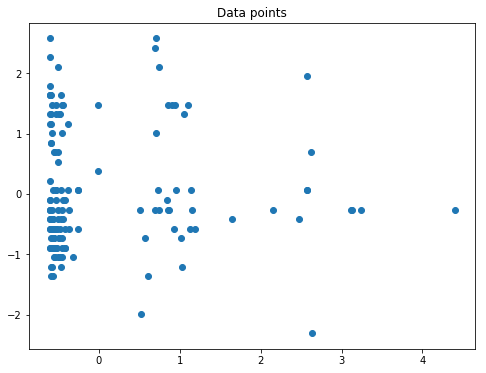

In [104]:
h = .02  # step size in the mesh

# Calculate min, max and limits
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
plt.figure(figsize=(8, 6))
#ax = plt.fig.add_subplot(111)

plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")

#plt.contourf(xx,yy,[[]],cmap=plt.cm.PRGn)
plt.axis('tight')
# Plot your testing points as wel
#for label in np.unique(y_test):
#    indices = np.where(y_test == label)
#    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
#                label='FP {}'.format(label))#


plt.legend(loc='lower right')

plt.show()

### Predict other Data
Nous allons maintenant tester la prédiction d'autres données qui ne sont pas les tests

In [107]:
#LoadData
path='../2-TransformedData/p30_2020-Feb-07-16_50_44.csv'

#path='../2-TransformedData/data2_2020-Jan-31-10_55_51.csv'
toPredict = pd.read_csv(path,names=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"], sep=',')
def scaleData2(data):
    data=data[1:]
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

#scaled_data = scaleData2(toPredict)

#prediction
#new_pred = knn.predict(scaled_data)


#print('Prediction: ',new_pred)


#ShowScore
#showScore(knn, X_test,new_pred)
#print('Score: %f' % knn.score(X_test,new_pred))
#toPredict.columns=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"]
#toPredict['IS_FP']=new_pred
#toPredict.set_option('display.max_rows',73)
toPredict

ECP    RC   MIN   MAX       MEAN             START  \
0   0000FB63AC1F3681EC880468   225 -69.0 -52.5 -61.195556  1581079347416077   
1   1007CEA7AC1F3681EAC5106D    18 -65.0 -56.5 -60.000000  1581079349961880   
2   1007CEA7AC1F3681EC880468    26 -69.0 -60.0 -63.038462  1581079349403036   
3   1007FB63AC1F3681EC880468   352 -69.5 -50.0 -60.995739  1581079347403888   
4   2005FB63AC1F3681AB1004E3    18 -65.0 -54.5 -60.361111  1581079350842864   
5   2005FB63AC1F3681AB10052A    16 -65.0 -54.5 -59.218750  1581079350656022   
6   2005FB63AC1F3681AB1005CE    28 -70.0 -58.0 -62.696429  1581079348998383   
7   2005FB63CE453265E5C61473     2 -66.5 -61.0 -63.750000  1581079351418729   
8   2005FB63EAC13681E4EC0F4B    61 -65.0 -53.5 -59.016393  1581079348979276   
9   2005FB63EAC13681E4EC0F4C    51 -69.0 -55.0 -59.911765  1581079349684491   
10  2005FB63EAC13681E4EC0F4F    57 -66.5 -54.5 -58.649123  1581079350169709   
11  2005FB63EAC13681E4EC0F50    63 -66.5 -53.5 -58.968254  1581079349656562   
12  2005FB63EAC13681E4EC0FD2     9 -64.0 -58.0 -60.500000  1581079350646330   
13  2005FB63EAC13681E4EC0FE8    38 -70.0 -57.5 -63.171053  1581079348608864   
14  2005FB63EAC13681E4EC0FE9    13 -61.5 -54.5 -59.230769  1581079391958689   
15  2005FB63EAC13681E4EC0FEA    19 -67.5 -56.5 -62.342105  1581079349983145   
16  2005FB63EAC13681E4EC0FEC     5 -65.5 -63.5 -64.200000  1581079350159697   
17  2005FB63EAC13681E5C6027B    75 -67.5 -51.5 -59.033333  1581079347527062   
18  2005FB63EAC13681E5C6028D    13 -64.5 -60.0 -61.884615  1581079350623365   
19  2005FB63EAC13681E5C60293    19 -67.5 -58.0 -61.578947  1581079350415117   
20  2005FB63EAC13681E5C602A1    65 -68.5 -52.0 -59.846154  1581079348961747   
21  2005FB63EAC13681E5C602B6    23 -67.5 -57.5 -61.413043  1581079349848624   
22  2005FB63EAC13681E5C602E8    11 -67.0 -61.5 -64.000000  1581079349801431   
23              245390003866   294 -70.0 -64.5 -67.360544  1581079295956571   
24              245390003868   540 -73.5 -58.0 -66.458333  1581079296026040   
25  300000000000000000017857   880 -66.0 -56.0 -60.331250  1581079295952078   
26  30000000000000000001785A   316 -68.0 -61.0 -62.971519  1581079296084124   
27  30000000000000000001785B    27 -61.5 -57.5 -60.629630  1581079296996766   
28  30000000000000000001785C  1227 -57.5 -48.5 -52.024042  1581079295954895   
29  300000000000000000017861   422 -68.0 -63.0 -65.605450  1581079296090845   
..                       ...   ...   ...   ...        ...               ...   
42  3005FB63AC1F3681EC8812AB     8 -68.5 -59.5 -64.562500  1581079350651915   
43  3005FB63AC1F3681EC8812B7    39 -70.0 -57.5 -62.307692  1581079349977294   
44  3005FB63AC1F3681EC8812DB    42 -66.5 -54.5 -60.976190  1581079348599349   
45  3005FB63AC1F3681EC881316    38 -65.0 -56.0 -59.236842  1581079349521138   
46  3005FB63AC1F3681EC881317    77 -67.5 -54.5 -60.558442  1581079348621923   
47  3005FB63AC1F3681EC881318    78 -67.0 -53.5 -60.044872  1581079349651158   
48  3005FB63AC1F3681EC88131E    33 -64.0 -55.5 -59.136364  1581079350176590   
49  3005FB63AC1F3681EC88132C    57 -69.0 -54.0 -60.868421  1581079348977548   
50  3005FB63AC1F3681EC881338    12 -61.5 -55.5 -57.666667  1581079351521444   
51  3005FB63AC1F3681EC88134B    21 -66.0 -54.5 -58.928571  1581079350464190   
52  3005FB63AC1F3681EC881378    61 -68.0 -53.5 -60.327869  1581079349028840   
53  3005FB63AC1F3681EC8813AD    35 -70.5 -55.0 -62.257143  1581079349091955   
54  3005FB63AC1F3681EC8813AE    34 -70.0 -58.5 -64.147059  1581079349230884   
55  3005FB63AC1F3681EC88141F    15 -65.5 -57.0 -59.566667  1581079350201256   
56  3005FB63AC1F3681EC88143C     9 -63.0 -56.0 -59.000000  1581079350893046   
57  3005FB63AC1F3681EC881448    41 -67.0 -52.0 -59.780488  1581079350382672   
58  3005FB63AC1F3681EC881451    10 -65.0 -56.5 -59.950000  1581079350863821   
59  3005FB63AC1F3681EC881458    24 -69.5 -57.0 -62.000000  1581079351526401   
60  3005FB63AC1F3681EC881490    14 -65.5 -57.5 -62.928571  1581079349139663

In [109]:
#Export predict data
pathExport='../6-ClassifiedData/knn_predict_30_2.csv'
toPredict.to_csv(pathExport, index = None, header=True)